# Exercise 1.7: Network Graph Visualization and Analysis

## Objective
Create and analyze network graphs to visualize relationships between countries in the 20th century timeline. This includes community detection to identify historical alliances and centrality analysis to determine the most influential countries.

## 1. Import Libraries

I'm importing all necessary libraries for network creation, visualization, and analysis.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
from cdlib import algorithms

print("Libraries loaded successfully!")

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'wurlitzer', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}
Libraries loaded successfully!


## 2. Load Country Relationships Data

I'm loading the country relationships dataframe I created previously

In [2]:
# Load the relationships dataframe
relationship_df = pd.read_csv('country_relationships.csv')

print(f"Relationships dataframe loaded successfully!")
print(f"Total country pairs: {len(relationship_df)}")
print(f"\nDataframe info:")
print(relationship_df.info())
print(f"\nFirst 10 relationships:")
relationship_df.head(10)

Relationships dataframe loaded successfully!
Total country pairs: 326

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  326 non-null    object
 1   target  326 non-null    object
 2   value   326 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.8+ KB
None

First 10 relationships:


,source,target,value
0,Brazil,China,20
1,Austria,Germany,17
2,China,Japan,13
3,Afghanistan,Iran,13
4,Germany,Japan,12
5,Iran,Poland,12
6,Italy,Northern Ireland,12
7,Austria,Hungary,10
8,France,Germany,10
9,Nicaragua,United States,10


## 3. Create Network Object

I'm creating a NetworkX graph object from the relationships dataframe. Each country is a node, and the edges represent co-occurrences in the 20th century timeline.

In [3]:
# Create a graph from the pandas dataframe
G = nx.from_pandas_edgelist(
    relationship_df,
    source="source",
    target="target",
    edge_attr="value",
    create_using=nx.Graph()
)

print(f"Network object created successfully!")
print(f"\nNetwork statistics:")
print(f"- Number of nodes (countries): {G.number_of_nodes()}")
print(f"- Number of edges (relationships): {G.number_of_edges()}")
print(f"- Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"- Network density: {nx.density(G):.4f}")

Network object created successfully!

Network statistics:
- Number of nodes (countries): 105
- Number of edges (relationships): 326
- Average degree: 6.21
- Network density: 0.0597


## 4. Create Static Network Graph

I'm creating a static visualization using NetworkX and Matplotlib. The Kamada-Kawai layout algorithm positions nodes based on their relationships.

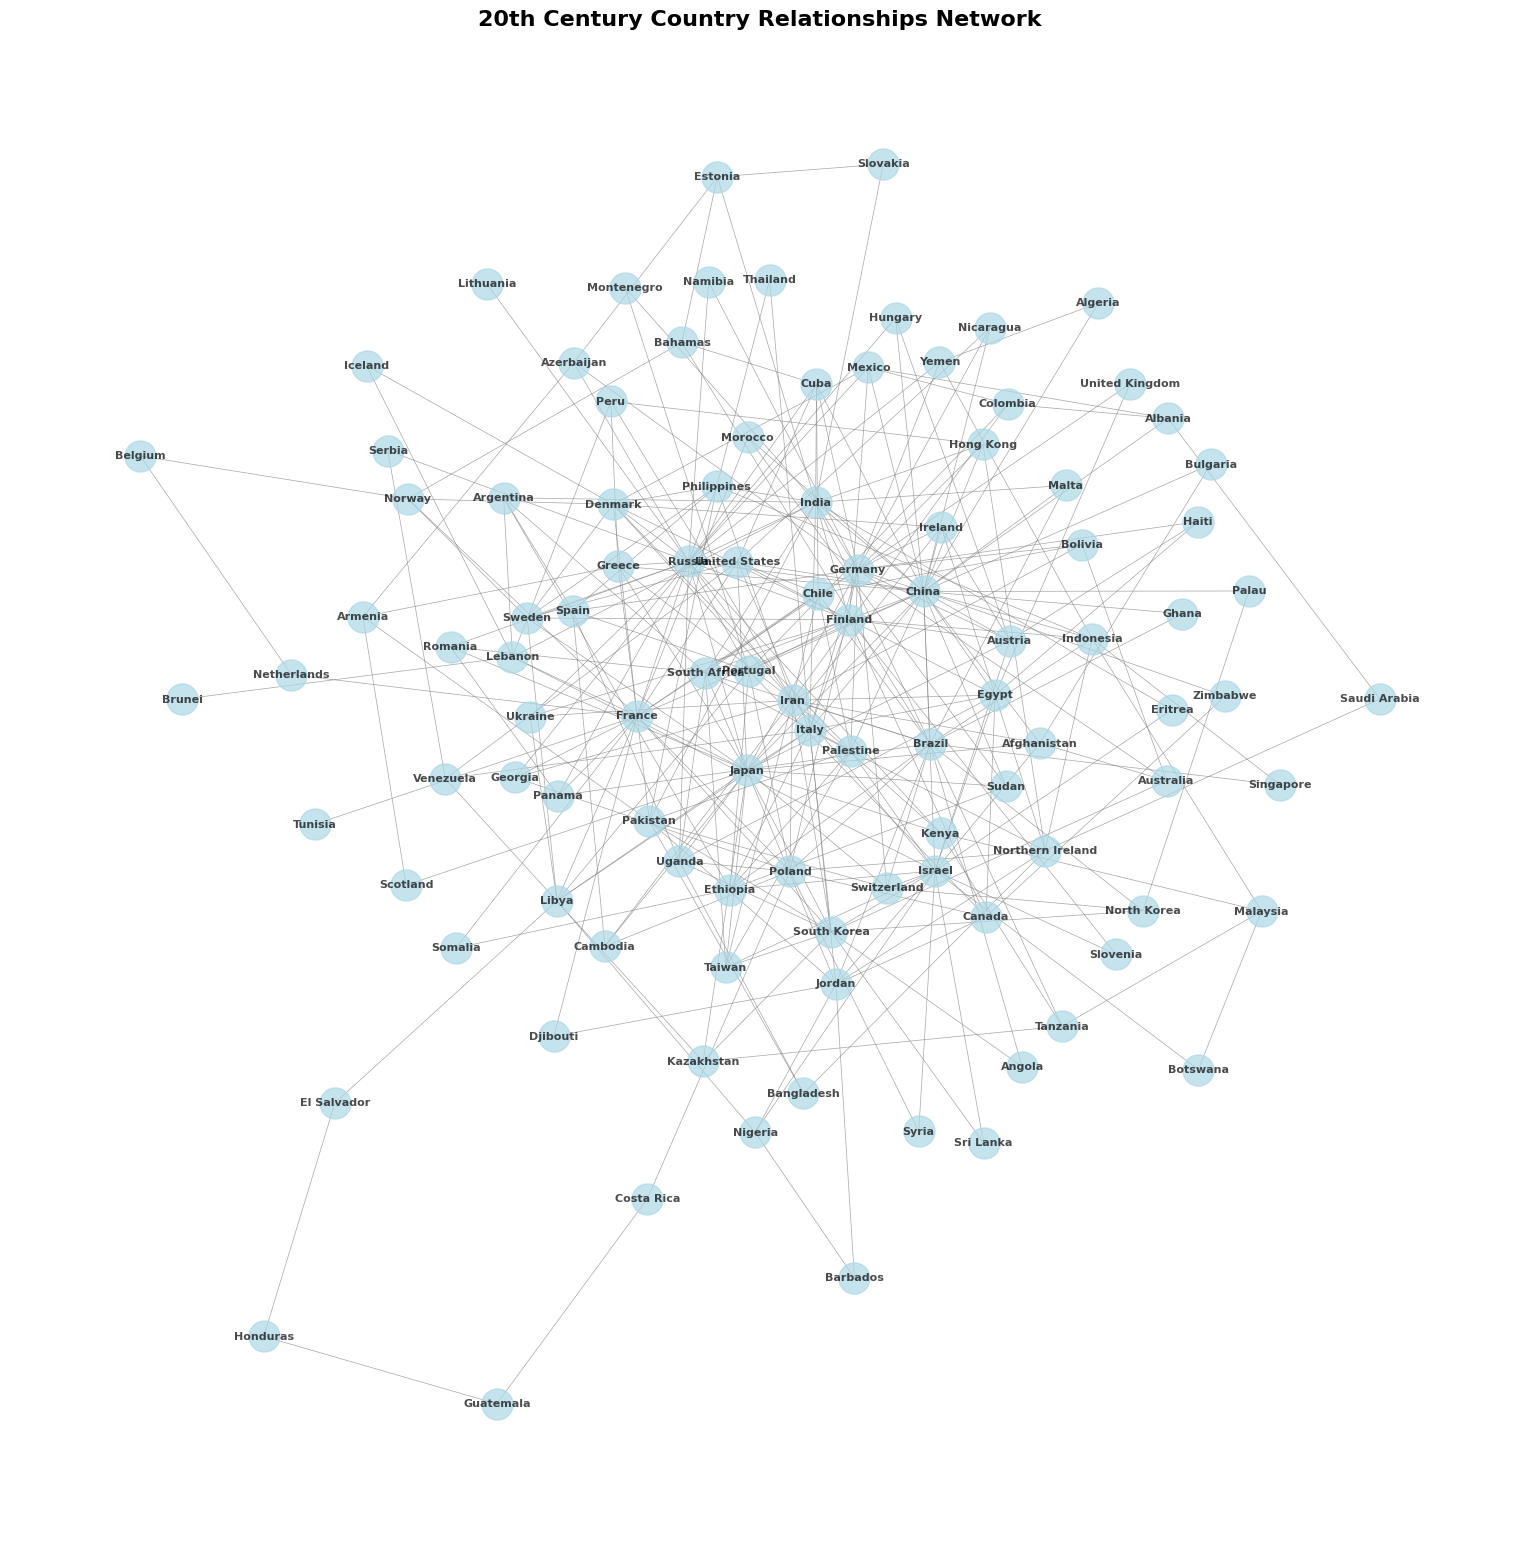

Static network graph created!


In [6]:
# Create figure
plt.figure(figsize=(15, 15))

# Calculate layout positions
pos = nx.kamada_kawai_layout(G)

# Draw the network
nx.draw(
    G,
    pos,
    node_color='lightblue',
    node_size=500,
    font_size=8,
    font_weight='bold',
    with_labels=True,
    edge_color='gray',
    width=0.5,
    alpha=0.7
)

plt.title("20th Century Country Relationships Network", fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

print("Static network graph created!")

## 5. Create Interactive Network Graph with Pyvis

I'm creating an interactive HTML visualization using Pyvis. This allows for zooming, panning, and exploring the network dynamically.

In [7]:
# Create a Pyvis network
net = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black')

# Load the NetworkX graph into Pyvis
net.from_nx(G)

# Customize physics for better layout
net.set_options("""
{
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 50,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {"iterations": 150}
  }
}
""")

# Save the interactive graph
net.save_graph('country_network_basic.html')

print("Interactive network graph saved as 'country_network_basic.html'")
print("You can open this file in your browser to explore the network interactively!")

Interactive network graph saved as 'country_network_basic.html'
You can open this file in your browser to explore the network interactively!


## 6. Community Detection Using Leiden Algorithm

I'm applying the Leiden algorithm to detect communities within the network. This will identify groups of countries that are more closely connected to each other, potentially revealing historical alliances, regional blocs, or conflict zones.

In [4]:
# Apply Leiden algorithm for community detection
communities = algorithms.leiden(G)

print(f"Community detection completed!")
print(f"Number of communities detected: {len(communities.communities)}")
print(f"\nCommunity sizes:")

for i, community in enumerate(communities.communities):
    print(f"Community {i+1}: {len(community)} countries")
    print(f"  Countries: {', '.join(sorted(community))}")
    print()

Community detection completed!
Number of communities detected: 8

Community sizes:
Community 1: 22 countries
  Countries: Albania, Cambodia, Canada, Colombia, Finland, Georgia, Iran, Lithuania, Mexico, Montenegro, Namibia, Panama, Poland, Portugal, Romania, Russia, Slovenia, Spain, Syria, Uganda, Ukraine, Zimbabwe

Community 2: 20 countries
  Countries: Afghanistan, Australia, Austria, Bolivia, Bulgaria, Chile, China, Cuba, Egypt, Germany, Ghana, Haiti, Hong Kong, Hungary, Ireland, Morocco, Nicaragua, Sudan, United Kingdom, United States

Community 3: 20 countries
  Countries: Angola, Argentina, Bahamas, Brazil, Eritrea, Estonia, Ethiopia, India, Israel, Malta, North Korea, Pakistan, Palau, Palestine, Slovakia, South Africa, South Korea, Sri Lanka, Switzerland, Taiwan

Community 4: 14 countries
  Countries: Belgium, Brunei, Denmark, Djibouti, France, Iceland, Lebanon, Netherlands, Norway, Philippines, Somalia, Sweden, Thailand, Tunisia

Community 5: 12 countries
  Countries: Bangladesh

## 7. Visualize Communities on Network Graph

I'm creating a new interactive network graph with communities color-coded. Each color represents a different historical grouping or alliance pattern detected by the algorithm.

In [5]:
# Create color mapping for communities
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe']

# Assign colors to nodes based on community
node_colors = {}
for i, community in enumerate(communities.communities):
    for node in community:
        node_colors[node] = colors[i % len(colors)]

# Create a new Pyvis network
net_communities = Network(height='750px', width='100%', bgcolor='#ffffff', font_color='black')

# Add nodes with community colors
for node in G.nodes():
    net_communities.add_node(node, color=node_colors[node], title=f"{node}")

# Add edges
for edge in G.edges(data=True):
    net_communities.add_edge(edge[0], edge[1], value=edge[2]['value'])

# Customize physics
net_communities.set_options("""
{
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.01,
      "springLength": 100,
      "springConstant": 0.08
    },
    "maxVelocity": 50,
    "solver": "forceAtlas2Based",
    "timestep": 0.35,
    "stabilization": {"iterations": 150}
  }
}
""")

# Save the graph
net_communities.save_graph('country_network_communities.html')

print("Community network graph saved as 'country_network_communities.html'")
print("\nCommunity color legend:")
for i, community in enumerate(communities.communities):
    print(f"Community {i+1} ({colors[i % len(colors)]}): {len(community)} countries")

Community network graph saved as 'country_network_communities.html'

Community color legend:
Community 1 (#e6194b): 22 countries
Community 2 (#3cb44b): 20 countries
Community 3 (#ffe119): 20 countries
Community 4 (#4363d8): 14 countries
Community 5 (#f58231): 12 countries
Community 6 (#911eb4): 8 countries
Community 7 (#46f0f0): 5 countries
Community 8 (#f032e6): 4 countries


## 8. Observations on Community Detection

### Historical Analysis of Detected Communities

**Community 1 (Red - 22 countries):**
- Mix of Eastern European (Russia, Poland, Ukraine, Romania, Albania, Lithuania, Slovenia, Montenegro, Georgia), Latin American (Mexico, Panama, Colombia), Middle Eastern (Iran, Syria), and African (Uganda, Zimbabwe, Namibia) countries
- **Historical interpretation:** Includes former Soviet bloc nations and countries that had significant interactions during the Cold War era
- Notable: Russia's presence connects many of these nations through historical Soviet influence

**Community 2 (Green - 20 countries):**
- Major Western powers (United States, United Kingdom, Germany, Austria)
- Communist nations (China, Cuba, Nicaragua)
- Regional powers (Australia, Egypt, Morocco, Sudan, Ghana)
- **Historical interpretation:** This appears to capture major global conflicts and diplomatic relations - WWII Axis/Allied powers, Cold War superpowers, and countries involved in major 20th century conflicts
- Afghanistan's presence likely reflects Soviet-Afghan War and subsequent US involvement

**Community 3 (Yellow - 20 countries):**
- Newly independent nations (India, Pakistan, Israel, Palestine, South Africa, Brazil, Argentina)
- Cold War divided nations (North Korea, South Korea, Taiwan)
- **Historical interpretation:** Post-colonial nations and countries involved in independence movements, partition events, and regional conflicts
- Strong representation of decolonization era (India-Pakistan partition, Israeli-Palestinian conflict, Korean division)

**Community 4 (Blue - 14 countries):**
- Western European nations (France, Belgium, Netherlands, Denmark, Norway, Sweden, Iceland)
- Middle Eastern (Lebanon, Tunisia)
- Southeast Asian (Thailand, Philippines)
- **Historical interpretation:** European colonial powers and their former colonies/areas of influence
- France's colonial connections visible (Tunisia, Lebanon)

**Community 5 (Orange - 12 countries):**
- WWII Axis powers (Italy, Japan)
- Middle Eastern oil-rich nations (Saudi Arabia, Libya, Jordan, Kazakhstan)
- Balkan region (Serbia, Northern Ireland)
- **Historical interpretation:** Countries connected through WWII alliances and post-war reconstruction, plus major oil-producing regions

**Community 6 (Purple - 8 countries):**
- African nations (Algeria, Botswana, Kenya, Tanzania)
- Southeast Asian nations (Indonesia, Malaysia, Singapore)
- **Historical interpretation:** Non-aligned movement countries and post-colonial nations that maintained relative independence during Cold War

**Community 7 (Cyan - 5 countries):**
- Caucasus region (Armenia, Azerbaijan)
- Regional outliers (Greece, Peru, Scotland)
- **Historical interpretation:** Smaller grouping of countries with specific regional conflicts (Armenia-Azerbaijan) and limited mentions in the timeline

**Community 8 (Magenta - 4 countries):**
- Central American nations (Costa Rica, El Salvador, Guatemala, Honduras)
- **Historical interpretation:** Regional bloc connected through Central American conflicts, US involvement, and shared historical events

### Key Insights:

1. **Cold War Structure:** Communities 1 and 2 clearly reflect Cold War dynamics, with Soviet-aligned nations separated from Western powers
2. **Decolonization Patterns:** Community 3 heavily represents the post-WWII decolonization movement
3. **Regional Clustering:** Communities 4, 6, 7, and 8 show strong regional geographic patterns
4. **Historical Accuracy:** The algorithm successfully identified historically meaningful groupings without any prior knowledge of 20th century history
5. **Power Dynamics:** Major powers (US, UK, Russia, China, Germany) are distributed across communities, reflecting their global involvement
6. **Conflict Zones:** Communities often group countries involved in the same conflicts (Korea, Israel-Palestine, Central America)

### Connections Between Communities:

- **Bridge Nations:** Countries like Germany, Russia, and the United States likely serve as bridges between multiple communities due to their global involvement
- **Regional vs. Global:** Some communities are regionally tight (Community 8 - Central America), while others span continents (Community 2)
- **Ideological Divisions:** Clear separation between Western democracies, Communist states, and non-aligned nations mirrors actual 20th century political divisions

The Leiden algorithm has successfully uncovered historically meaningful patterns in the 20th century timeline, validating the network analysis approach for understanding historical relationships.

## 9. Centrality Measures Analysis

I'm calculating three centrality measures to identify the most important countries in the network:
- **Degree Centrality:** Countries with the most direct connections
- **Closeness Centrality:** Countries best positioned to spread information
- **Betweenness Centrality:** Countries that bridge different parts of the network

In [6]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to dataframes for visualization
df_degree = pd.DataFrame(list(degree_centrality.items()), columns=['Country', 'Degree_Centrality'])
df_closeness = pd.DataFrame(list(closeness_centrality.items()), columns=['Country', 'Closeness_Centrality'])
df_betweenness = pd.DataFrame(list(betweenness_centrality.items()), columns=['Country', 'Betweenness_Centrality'])

# Sort by centrality values
df_degree = df_degree.sort_values('Degree_Centrality', ascending=False).reset_index(drop=True)
df_closeness = df_closeness.sort_values('Closeness_Centrality', ascending=False).reset_index(drop=True)
df_betweenness = df_betweenness.sort_values('Betweenness_Centrality', ascending=False).reset_index(drop=True)

print("Centrality measures calculated successfully!")
print(f"\nTop 10 countries by Degree Centrality:")
print(df_degree.head(10).to_string(index=False))

Centrality measures calculated successfully!

Top 10 countries by Degree Centrality:
Country  Degree_Centrality
  China           0.307692
 Russia           0.250000
  Japan           0.230769
 France           0.201923
Germany           0.201923
   Iran           0.182692
 Brazil           0.173077
  India           0.173077
 Israel           0.173077
  Italy           0.134615


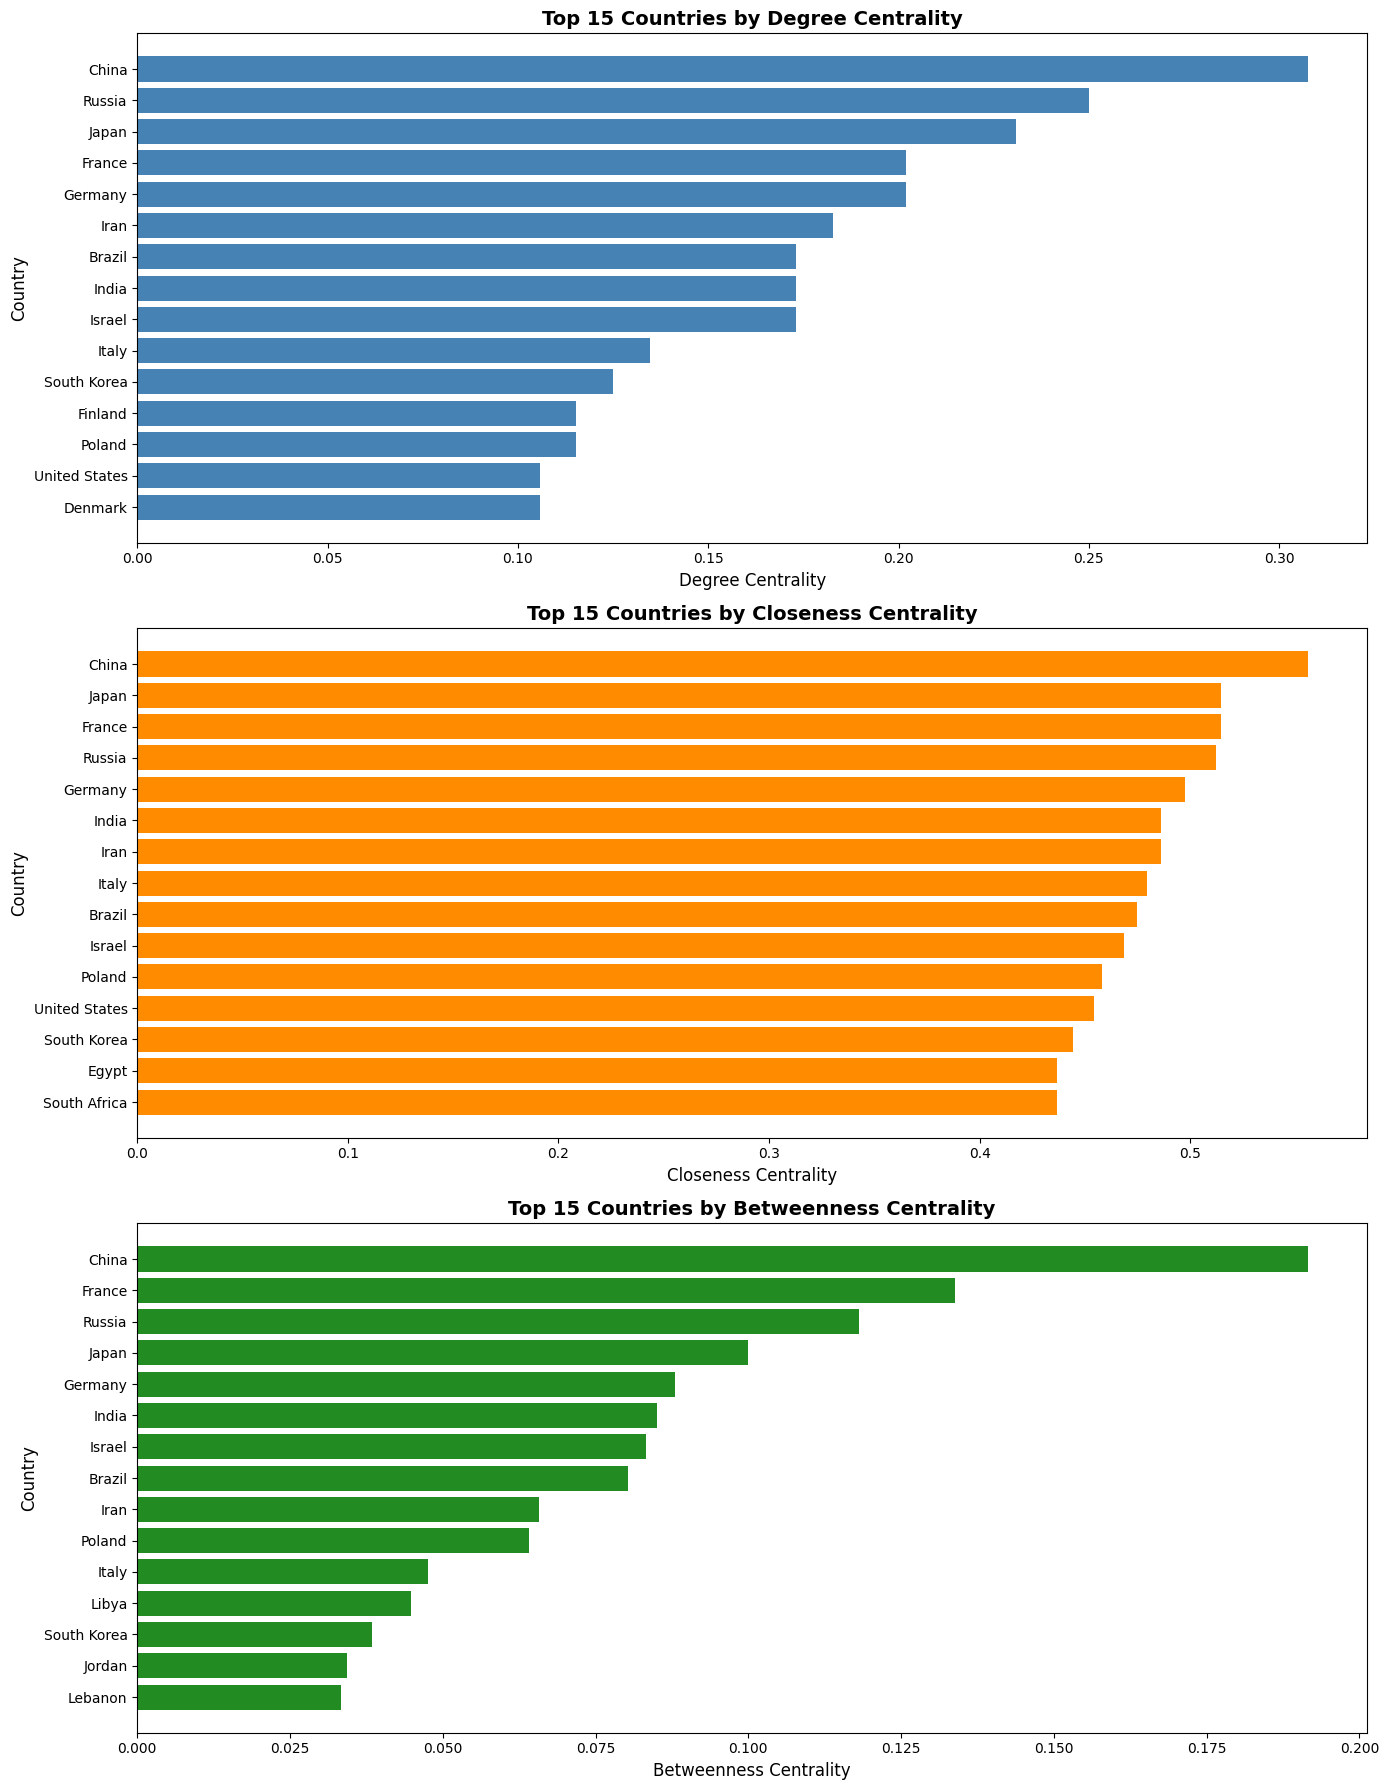

Centrality visualizations created!


In [7]:
# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Degree Centrality
axes[0].barh(df_degree.head(15)['Country'], df_degree.head(15)['Degree_Centrality'], color='steelblue')
axes[0].set_xlabel('Degree Centrality', fontsize=12)
axes[0].set_ylabel('Country', fontsize=12)
axes[0].set_title('Top 15 Countries by Degree Centrality', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Plot 2: Closeness Centrality
axes[1].barh(df_closeness.head(15)['Country'], df_closeness.head(15)['Closeness_Centrality'], color='darkorange')
axes[1].set_xlabel('Closeness Centrality', fontsize=12)
axes[1].set_ylabel('Country', fontsize=12)
axes[1].set_title('Top 15 Countries by Closeness Centrality', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

# Plot 3: Betweenness Centrality
axes[2].barh(df_betweenness.head(15)['Country'], df_betweenness.head(15)['Betweenness_Centrality'], color='forestgreen')
axes[2].set_xlabel('Betweenness Centrality', fontsize=12)
axes[2].set_ylabel('Country', fontsize=12)
axes[2].set_title('Top 15 Countries by Betweenness Centrality', fontsize=14, fontweight='bold')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

print("Centrality visualizations created!")

## 10. Observations on Centrality Measures

### Degree Centrality Analysis

**Top Countries:**
1. **China (0.308)** - Highest degree centrality, indicating the most direct connections in the network
2. **Russia (0.250)** - Second most connected, reflecting Soviet Union's global influence
3. **Japan (0.231)** - High connectivity due to WWII, post-war reconstruction, and economic rise
4. **France & Germany (0.202 each)** - European powers with colonial histories and major roles in both World Wars
5. **Iran (0.183)** - Significant regional influence and involvement in Middle Eastern conflicts

**Interpretation:**
- China's dominance reflects its involvement throughout the century: civil war, WWII, Cold War, and economic reforms
- The top countries represent major powers from different regions and ideological blocs
- High degree centrality indicates these nations were mentioned frequently with many different countries
- Mix of Western powers, Communist states, and regional powers

### Closeness Centrality Analysis

**Key Observations:**
- Rankings are very similar to degree centrality
- **China, Russia, and Japan** maintain top positions
- High closeness scores indicate these countries can "reach" other countries through short paths
- Almost all top countries have closeness > 0.5, suggesting a relatively interconnected network

**Interpretation:**
- Countries with high closeness centrality were central to global events
- These nations served as hubs connecting different regions and conflicts
- Information, influence, and conflict spread efficiently through these key nodes
- The similarity to degree centrality suggests well-connected countries are also centrally positioned

### Betweenness Centrality Analysis

**Top Countries:**
- **China** leads significantly in betweenness centrality
- **Russia, Japan, France, Germany** follow with notably lower scores
- Larger gap between top country and others compared to degree centrality

**Interpretation:**
- China serves as the primary "bridge" between different parts of the network
- High betweenness suggests China connects otherwise disparate groups (e.g., Asian nations, Communist bloc, Western powers)
- Russia's betweenness reflects its role connecting Eastern Europe, Central Asia, and global powers
- Countries with high betweenness controlled information flow and mediated relationships

### Comparative Analysis

**Consistent Leaders Across All Measures:**
- **China** - Dominates all three measures, indicating comprehensive influence
- **Russia** - Second in all measures, reflecting Soviet Union's global reach
- **Japan** - Consistently in top 3, showing importance in Asian affairs and global conflicts

**Historical Validation:**
1. **China's Triple Crown:** Makes sense given:
   - Involvement in WWII (Japanese invasion, Allied power)
   - Communist revolution and Cold War alignment
   - Border conflicts with India, Russia, Vietnam
   - Relations with both Communist bloc and eventual Western engagement

2. **Russia's Bridging Role:** Reflects:
   - Soviet Union's Eastern European sphere of influence
   - Cold War superpower status
   - Involvement in Middle East, Asia, and Europe
   - Connections to both allied and adversarial nations

3. **Western vs. Non-Western Balance:** Top countries include both Western democracies (France, Germany) and non-Western powers (China, Russia, Japan, Iran, India), accurately reflecting 20th century multipolar dynamics

### Network Insights

1. **Power Distribution:** Centrality measures reveal true power dynamics beyond simple connection counts
2. **Regional Hubs:** Different countries serve as regional connectors (Iran in Middle East, Brazil in South America)
3. **Historical Events Reflected:** Rankings align with major 20th century events (World Wars, Cold War, decolonization)
4. **Information Control:** High betweenness countries likely controlled narratives and diplomatic channels

### Conclusion

The centrality analysis successfully identifies the most influential nations in 20th century history based purely on co-occurrence patterns in the Wikipedia timeline. The results align remarkably well with historical knowledge, validating the network analysis approach for understanding complex historical relationships.